In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import random

In [0]:
dataset, metadata = tfds.load('deep_weeds', as_supervised=True, with_info=True)
data=dataset['train']

In [0]:
num_train_examples = metadata.splits['train'].num_examples

In [22]:
print(num_train_examples)

17509


In [0]:
data =  data.cache()

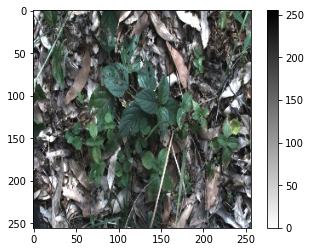

In [24]:
# Take a single image, and remove the color dimension by reshaping
for image, label in data.take(1):
  break
image = image.numpy().reshape((256,256,3))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

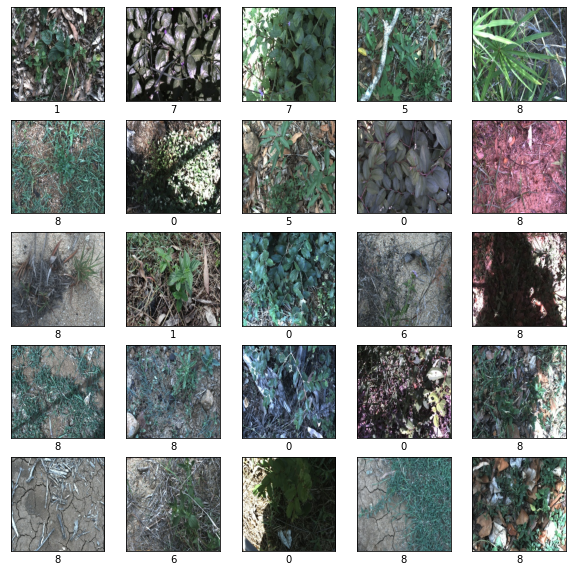

In [25]:
class_names=['0','1','2','3','4','5','6','7','8']
plt.figure(figsize=(10,10))
i = 0
for (image, label) in data.take(25):
    image = image.numpy().reshape((256,256,3))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [0]:
data = data.shuffle(buffer_size=17000)
num_train_examples=num_train_examples-1500
num_test_examples=1500
test_dataset = data.take(1500) 
train_dataset = data.skip(1500)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(9)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
import math
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)

model.fit(train_dataset, epochs=8, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 173 steps
Epoch 1/8
173/173 [==============================] - 19s 112ms/step - loss: 2.2914 - acc: 0.5157
Epoch 2/8
173/173 [==============================] - 11s 62ms/step - loss: 1.4397 - acc: 0.5199
Epoch 3/8
173/173 [==============================] - 9s 51ms/step - loss: 1.3488 - acc: 0.5392
Epoch 4/8
173/173 [==============================] - 9s 51ms/step - loss: 1.2761 - acc: 0.5616
Epoch 5/8
173/173 [==============================] - 9s 51ms/step - loss: 1.1907 - acc: 0.5871
Epoch 6/8
173/173 [==============================] - 9s 51ms/step - loss: 1.0792 - acc: 0.6302
Epoch 7/8
173/173 [==============================] - 9s 51ms/step - loss: 0.9018 - acc: 0.6917
Epoch 8/8
173/173 [==============================] - 9s 51ms/step - loss: 0.7324 - acc: 0.7554
